In [92]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score

In [2]:
# 读取数据集
data = pd.read_csv("raw_price_train/1_r_price_train.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,2012/9/5,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,2012/9/6,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,2012/9/7,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,2012/9/10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500


## 描述性观察

(array([ 92.,  92., 156.,  57.,  59.,  74.,  38.,  98.,  67.,  96.]),
 array([ 50.932652 ,  58.5335442,  66.1344364,  73.7353286,  81.3362208,
         88.937113 ,  96.5380052, 104.1388974, 111.7397896, 119.3406818,
        126.941574 ]),
 <a list of 10 Patch objects>)

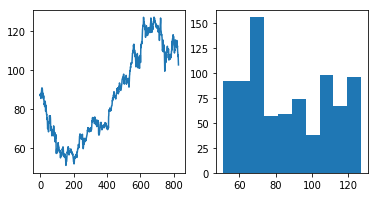

In [33]:
price = np.array(data["Adj Close"].tolist())
fig,axes = plt.subplots(1,2,figsize = (6,3))
axes[0].plot(price)
axes[1].hist(price)

In [55]:
print("mean:",np.mean(price))
print("std:",np.std(price))

mean: 86.88456314234017
std: 22.750528671101197


### 特征相关性分析

## 线性回归

In [57]:
# 处理数据 m为子序列长度
def preprocess(data,m):
    '''
    data: the dataframe of stock price
    m: the length of sequence
    '''
    adj_close = data["Adj Close"].tolist()
    #
    res_X = []
    res_y = []
    # 剔除前4个元素
    for i in range(4,len(adj_close)-m):
        res_X.append(adj_close[i:i+m])
        res_y.append(adj_close[i+m])
    return res_X,res_y

In [64]:
# 归一化
min_data = np.min(data["Adj Close"].values)
max_data = np.max(data["Adj Close"].values)
#data["Adj Close"] = (data["Adj Close"]-min_data)/(max_data-min_data)

In [66]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,95.108574,96.448570,94.928574,96.424286,0.476108,91973000
1,2012/9/5,96.510002,96.621429,95.657143,95.747147,0.468059,84093800
2,2012/9/6,96.167145,96.898575,95.828575,96.610001,0.478316,97799100
3,2012/9/7,96.864288,97.497147,96.538574,97.205711,0.485397,82416600
4,2012/9/10,97.207146,97.612854,94.585716,94.677139,0.455340,121999500


In [67]:
m = 5
X,y = preprocess(data,m)

In [86]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = 0.3)

In [87]:
# 训练模型
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
y_est = model.predict(X_test)
y_est = y_est*(max_data-min_data)+min_data
y_test =np.array(y_test)*(max_data-min_data)+min_data

In [89]:
np.power(y_test-y_est,2).mean()

2.082273408410812

In [94]:
# k折验证
model_k = LinearRegression()
scores = cross_val_score(model_k, X, y, cv=10, scoring='mean_squared_error')

In [95]:
scores

array([-0.00044025, -0.00032567, -0.0001277 , -0.0001771 , -0.00024902,
       -0.00012312, -0.00034696, -0.00056747, -0.00064636, -0.00068619])

In [110]:
np.array(X).shape

(820, 5)

In [145]:
model_kfold = LinearRegression()

kf = KFold(n_splits=20)
mse = []
for i,j in kf.split(X,y):

    model_kfold.fit([X[item] for item in i],[y[item] for item in i])
    y_est = model_kfold.predict([X[item] for item in j])
    y_est = y_est*(max_data-min_data)+min_data
    y_test =np.array([y[item] for item in j])*(max_data-min_data)+min_data
    mse.append(np.power(y_test-y_est,2).mean())
    
np.array(mse).mean()

2.142418878047504

In [152]:
a = [2,3,4,5]
a.max()

AttributeError: 'list' object has no attribute 'max'

In [151]:
np.array(a).max()

5

## Cheating Part

In [8]:
start = datetime.datetime(2012,9,4)
end = datetime.datetime(2015,12,18)
apple = web.DataReader("AAPL","yahoo",start,end)
print(apple.head())

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-09-04  96.448570  94.928574  95.108574  96.424286   91973000.0  84.512062
2012-09-05  96.621429  95.657143  96.510002  95.747147   84093800.0  83.918564
2012-09-06  96.898575  95.828575  96.167145  96.610001   97799100.0  84.674820
2012-09-07  97.497147  96.538574  96.864288  97.205711   82416600.0  85.196938
2012-09-10  97.612854  94.585716  97.207146  94.677139  121999500.0  82.980743


In [15]:
price = np.array(data["Adj Close"].tolist())
apple_price = np.array(apple["Adj Close"].tolist())
result = price-apple_price
result.mean()

2.6020104577356946